In [1]:
# Image classification using RNN's on the MNIST handwritten character recognition dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

x_train shape : (45000, 28, 28)
y_train shape : (45000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)



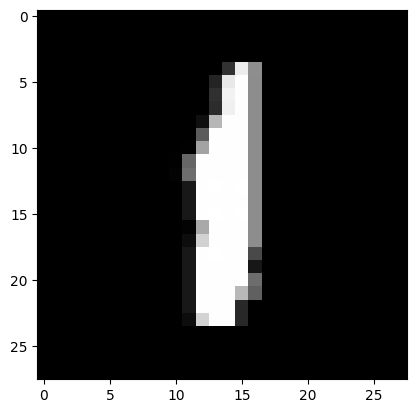

y_train : 1


In [3]:
# Load the data using keras.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizing the data.
x_train = x_train / 255.0
x_test = x_test / 255.0

# TTS 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

print("y_train : {}".format(y_train[0]))

x_train shape : (45000, 28, 28)
y_train shape : (45000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)



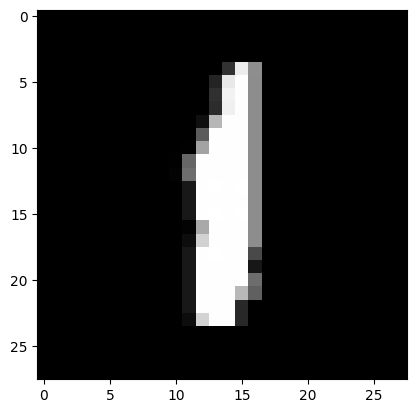

In [4]:
print("x_train shape : {}\ny_train shape : {}\nx_test shape : {}\ny_test shape : {}\n"
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
# The architecture is inspired from : 
# https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/3_NeuralNetworks/recurrent_network.ipynb

model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(28*28,1)),
     tf.keras.layers.LSTM(units=32), # units is the number of neurons for LSTM layer
     tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.Accuracy())

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 4682 (18.29 KB)
Trainable params: 4682 (18.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# For training and testing, reshape the input.
x_train_flatten = np.resize(x_train, (len(x_train), 28*28, 1))
x_test_flatten = np.resize(x_test, (len(x_test), 28*28, 1))

print(x_train_flatten.shape)

(45000, 784, 1)


In [8]:
# Make data categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
hist = model.fit(x_train_flatten, y_train, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 662s 466ms/step - loss: 2.3016 - accuracy: 0.0000e+00
Epoch 2/20
1407/1407 [==============================] - 636s 452ms/step - loss: 2.3014 - accuracy: 0.0000e+00
Epoch 3/20
1407/1407 [==============================] - 651s 463ms/step - loss: 2.3014 - accuracy: 0.0000e+00
Epoch 4/20
1407/1407 [==============================] - 653s 464ms/step - loss: 2.3013 - accuracy: 0.0000e+00
Epoch 5/20
 212/1407 [===>..........................] - ETA: 9:59:22 - loss: 2.3015 - accuracy: 0.0000e+00 